# Linear Regression to Polynomial Regression
**Before you begin, understand the problem**

## Imports

In [11]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Machine learning
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import r2_score

# Other
from IPython.display import Image
import configparser
import subprocess
import warnings
import pprint
import time
import os

## Prepare Principal Directory

In [8]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [9]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projects/artificial_inteligence/machine_learning/supervised_learning/linear_models/linear_regression/notebooks_and_examples'

## Cell Format

In [12]:
# hide_code
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Format the data os all table (float_format 3)
pd.set_option('display.float_format', '{:.6}'.format)

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# Pretty print
pp = pprint.PrettyPrinter(indent=4)

sns.set_style('whitegrid')
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [31]:
n_samples = 100
X = np.linspace(0, 10, 100)
y = X ** 3 + np.random.randn(n_samples) * 100 + 100

print(X)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

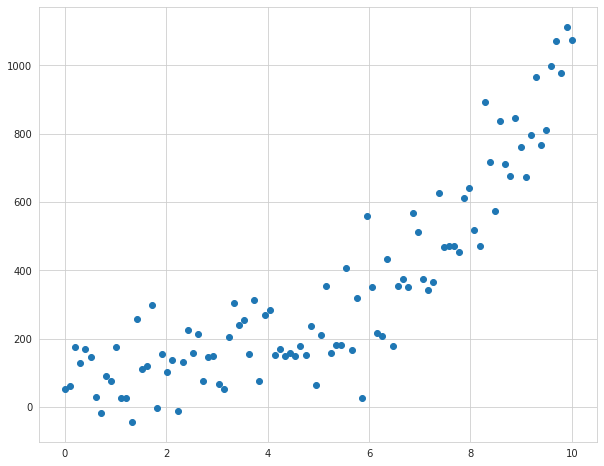

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)

## Create Model

In [16]:
lr_model = LinearRegression()

## Train Model

In [17]:
lr_model.fit(X.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Make Predictions
Lembre: você esta fazendo predições para o eixo y (variável DEPENDENTE)

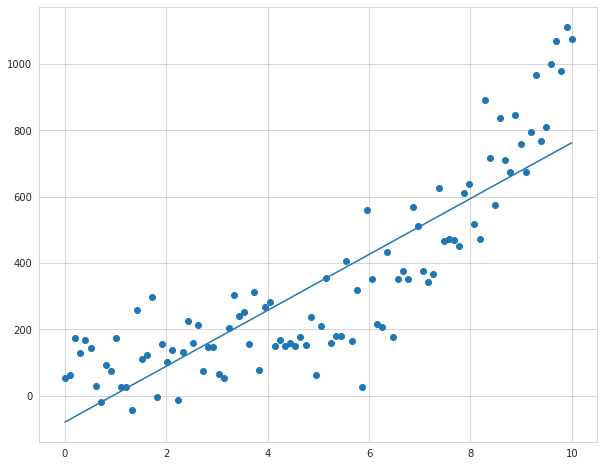

In [19]:
model_pred = lr_model.predict(X.reshape(-1,1))

plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.plot(X, model_pred)

## Evaluation Model

In [20]:
print(r2_score(y, model_pred))

0.7321714751199564


## Upgrade linear --> Polynomial 
Os dados apresentam uma marginalidade, devido a isso é necessário gerar um polinômio.

In [32]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.reshape(-1, 1))
print(X_poly)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.01010101e-01 1.02030405e-02]
 [1.00000000e+00 2.02020202e-01 4.08121620e-02]
 [1.00000000e+00 3.03030303e-01 9.18273646e-02]
 [1.00000000e+00 4.04040404e-01 1.63248648e-01]
 [1.00000000e+00 5.05050505e-01 2.55076013e-01]
 [1.00000000e+00 6.06060606e-01 3.67309458e-01]
 [1.00000000e+00 7.07070707e-01 4.99948985e-01]
 [1.00000000e+00 8.08080808e-01 6.52994592e-01]
 [1.00000000e+00 9.09090909e-01 8.26446281e-01]
 [1.00000000e+00 1.01010101e+00 1.02030405e+00]
 [1.00000000e+00 1.11111111e+00 1.23456790e+00]
 [1.00000000e+00 1.21212121e+00 1.46923783e+00]
 [1.00000000e+00 1.31313131e+00 1.72431385e+00]
 [1.00000000e+00 1.41414141e+00 1.99979594e+00]
 [1.00000000e+00 1.51515152e+00 2.29568411e+00]
 [1.00000000e+00 1.61616162e+00 2.61197837e+00]
 [1.00000000e+00 1.71717172e+00 2.94867871e+00]
 [1.00000000e+00 1.81818182e+00 3.30578512e+00]
 [1.00000000e+00 1.91919192e+00 3.68329762e+00]
 [1.00000000e+00 2.02020202e+00 4.081216

## Create Model

In [41]:
poly_model = LinearRegression()

## Train Model

In [42]:
poly_model.fit(X_poly, y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Make Predictions

In [43]:
y_pred = poly_model.predict(X_poly)

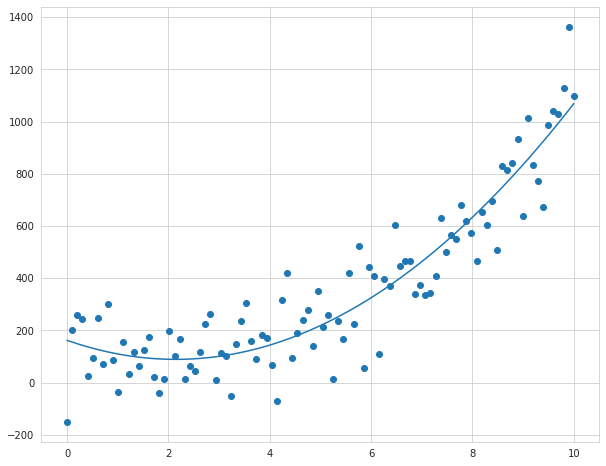

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.plot(X, y_pred)

## Evaluation Model

In [45]:
print(r2_score(y, y_pred))

0.856992977291759


Clearly, the polynomial features of degree 2 helped to fit the data much better rather than simple linear features.

---